<a href="https://colab.research.google.com/github/yasumorishima/mlb-data-analysis/blob/main/notebooks/wbc_2023_sandoval_scouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://baseballsavant.mlb.com/savant-player/patrick-sandoval-663776?stats=statcast-r-pitching-mlb
# sandoval

In [ ]:
!pip install pybaseball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 KB 36.9 MB/s eta 0:00:00


In [ ]:
from pybaseball import statcast

In [ ]:
df = statcast(start_dt='2022-03-30', end_dt='2022-12-31')

This is a large query, it may take a moment to complete


/usr/local/lib/python3.9/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 231/231 [05:44<00:00,  1.49s/it]


In [ ]:
df_663776 = df[df['pitcher'] == 663776]

In [ ]:
# df_663776のpitch_typeカラムに含まれるユニークな球種を確認する
unique_pitch_types = df_663776['pitch_type'].unique()

# 確認した球種を表示する
print(unique_pitch_types)


['CH' 'SI' 'FF' 'SL' 'CU' nan]


表示された球種は以下のようになります：

* CH：チェンジアップ（Changeup） - 速球よりも遅い速度で投げられ、バッターのタイミングを狂わせる目的がある。
* SI：シンカー（Sinker） - 速球の一種で、ボールが下に落ちる動きがあります。グラウンドボールを誘発することが目的。
* FF：フォーシーム・ファストボール（Four-seam Fastball） - 最も一般的な速球で、ボールが高速で直線的に飛びます。
* SL：スライダー（Slider） - 水平方向に大きく曲がる変化球で、速球と同じような投げ方をするが、速度が遅く、横方向にスライドするような動きがあります。
* CU：カーブ（Curveball） - 上から下に大きく落ちる変化球で、バッターのタイミングを狂わせる効果があります。
* nanは、その球種が不明または記録されていないことを示しています。

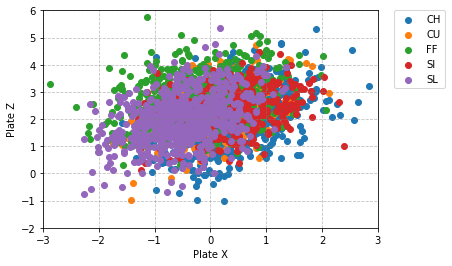

In [ ]:
import matplotlib.pyplot as plt

# データを pitch_type ごとにグループ分けする
grouped = df_663776.groupby('pitch_type')

# pitch_type ごとに、'plate_x' を X 軸、'plate_z' を Y 轴とした散布図を作成する
for pitch_type, data in grouped:
    plt.scatter(data['plate_x'], data['plate_z'], label=pitch_type)

# 凡例を表示する
# plt.legend()

plt.xlim(-3, 3)
plt.ylim(-2, 6)

plt.xlabel('Plate X')
plt.ylabel('Plate Z')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# 罫線
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)



# グラフを表示する
plt.show()


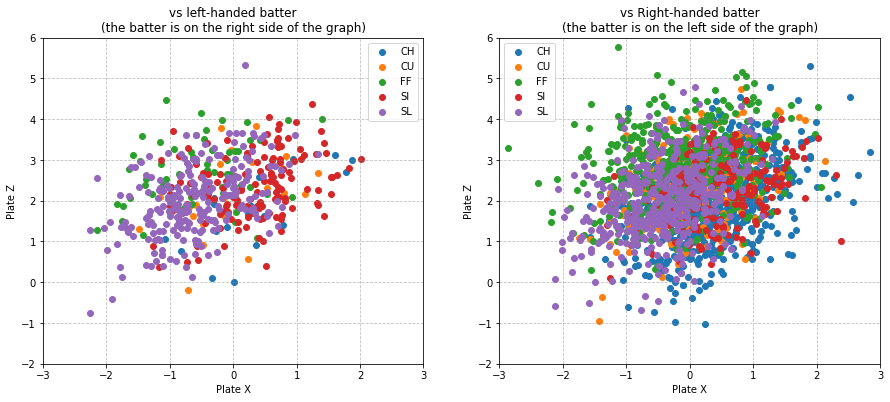

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# vs左打者
df_663776_L = df_663776[df_663776['stand'] == 'L']
grouped_L = df_663776_L.groupby('pitch_type')

for pitch_type, data in grouped_L:
    axs[0].scatter(data['plate_x'], data['plate_z'], label=pitch_type)

axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-2, 6)
axs[0].set_xlabel('Plate X')
axs[0].set_ylabel('Plate Z')
axs[0].legend()
axs[0].grid(which='both', linestyle='--', color='gray', alpha=0.5)
axs[0].set_title("vs left-handed batter\n(the batter is on the right side of the graph)")

# vs右打者
df_663776_R = df_663776[df_663776['stand'] == 'R']
grouped_R = df_663776_R.groupby('pitch_type')

for pitch_type, data in grouped_R:
    axs[1].scatter(data['plate_x'], data['plate_z'], label=pitch_type)

axs[1].set_xlim(-3, 3)
axs[1].set_ylim(-2, 6)
axs[1].set_xlabel('Plate X')
axs[1].set_ylabel('Plate Z')
axs[1].legend()
axs[1].grid(which='both', linestyle='--', color='gray', alpha=0.5)
axs[1].set_title("vs Right-handed batter\n(the batter is on the left side of the graph)")

plt.show()


In [ ]:
# vs左打者

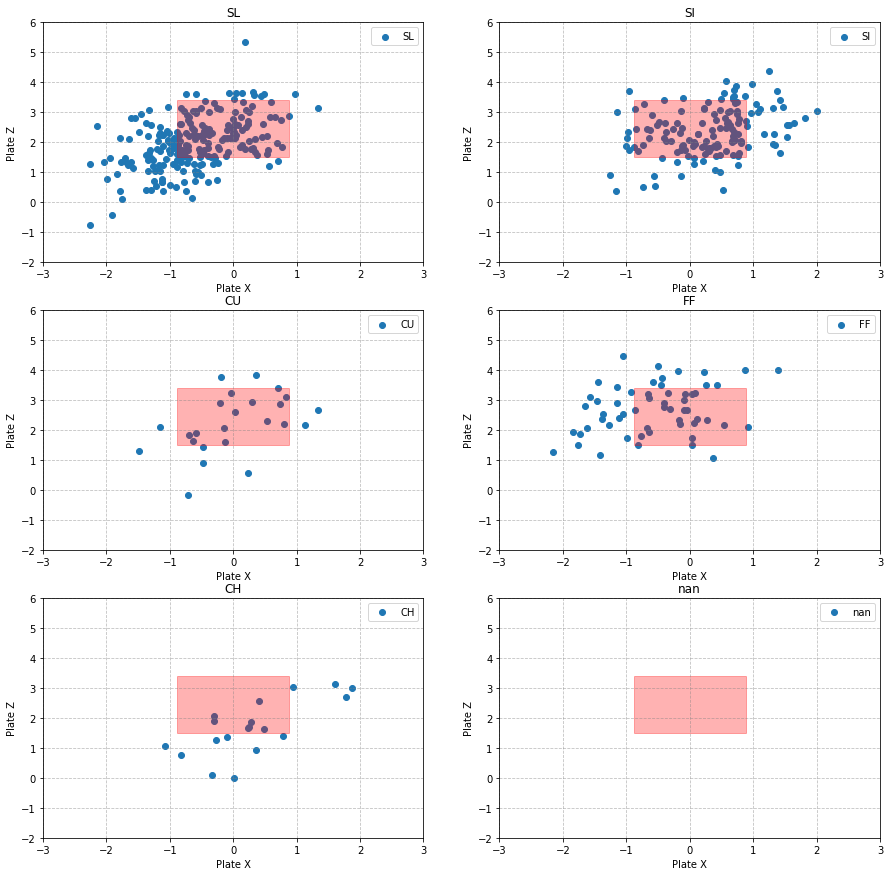

In [ ]:
# vs Left batter
pitch_types_L = [pt for pt in df_663776_L['pitch_type'].unique() if pt != 'CS']
fig, axs = plt.subplots(len(pitch_types_L)//2, 2, figsize=(15, 15))  # 3x2のグリッドに変更

for i, pitch_type in enumerate(pitch_types_L):
    df_663776_L_cs = df_663776_L[df_663776_L['pitch_type'] == pitch_type]
    axs[i//2, i%2].scatter(df_663776_L_cs['plate_x'], df_663776_L_cs['plate_z'], label=pitch_type)
    axs[i//2, i%2].set_xlim(-3, 3)
    axs[i//2, i%2].set_ylim(-2, 6)
    axs[i//2, i%2].set_xlabel('Plate X')
    axs[i//2, i%2].set_ylabel('Plate Z')
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(which='both', linestyle='--', color='gray', alpha=0.5)
    axs[i//2, i%2].set_title(pitch_type)

    # ストライクゾーン
    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    # すべてのグラフに対してストライクゾーンを表示
    axs[i//2, i%2].fill(x, y, color='r', alpha=0.3)

plt.show()

In [ ]:
# vs右打者

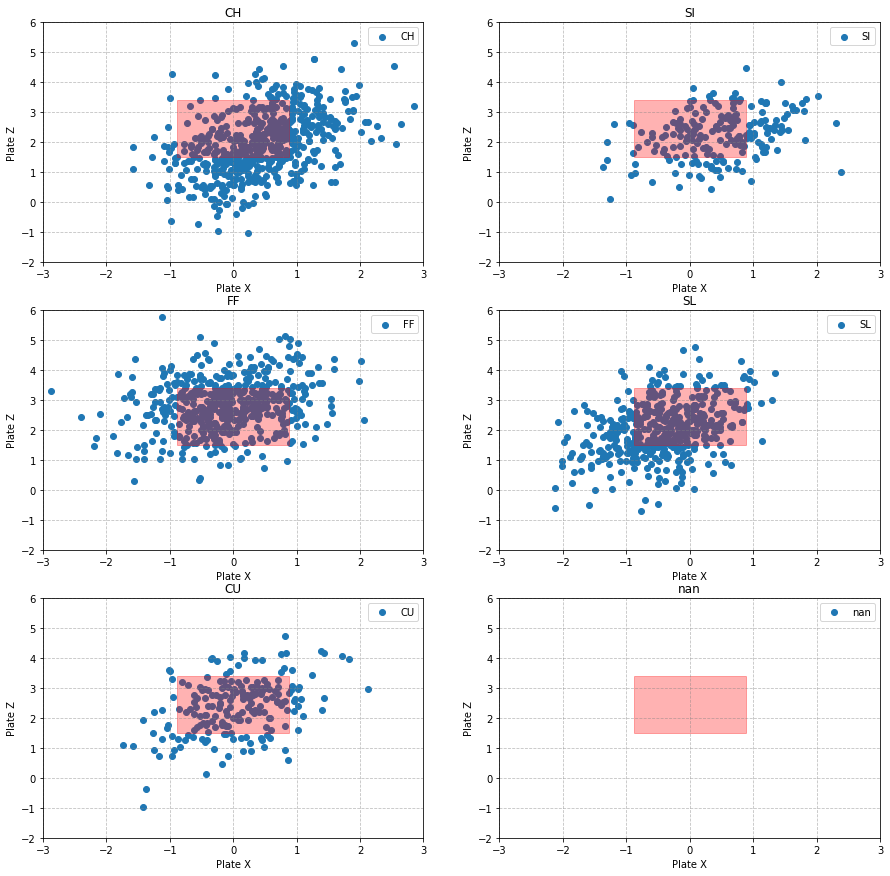

In [ ]:
# vs Right batter
pitch_types_R = [pt for pt in df_663776_R['pitch_type'].unique() if pt != 'CS']
fig, axs = plt.subplots(len(pitch_types_R)//2 + len(pitch_types_R)%2, 2, figsize=(15, 15))  # グリッドのサイズを変更

for i, pitch_type in enumerate(pitch_types_R):
    df_663776_R_cs = df_663776_R[df_663776_R['pitch_type'] == pitch_type]
    axs[i//2, i%2].scatter(df_663776_R_cs['plate_x'], df_663776_R_cs['plate_z'], label=pitch_type)
    axs[i//2, i%2].set_xlim(-3, 3)
    axs[i//2, i%2].set_ylim(-2, 6)
    axs[i//2, i%2].set_xlabel('Plate X')
    axs[i//2, i%2].set_ylabel('Plate Z')
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(which='both', linestyle='--', color='gray', alpha=0.5)
    axs[i//2, i%2].set_title(pitch_type)

    # ストライクゾーン
    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    # すべてのグラフに対してストライクゾーンを表示
    axs[i//2, i%2].fill(x, y, color='r', alpha=0.3)

plt.show()


In [ ]:
print("Total pitch type counts:")
print(df_663776['pitch_type'].value_counts())

print("\nLeft batter pitch type counts:")
print(df_663776_L['pitch_type'].value_counts())

print("\nRight batter pitch type counts:")
print(df_663776_R['pitch_type'].value_counts())


Total pitch type counts:
SL    673
CH    587
FF    544
SI    340
CU    225
Name: pitch_type, dtype: int64

Left batter pitch type counts:
SL    226
SI    143
FF     57
CU     24
CH     19
Name: pitch_type, dtype: int64

Right batter pitch type counts:
CH    568
FF    487
SL    447
CU    201
SI    197
Name: pitch_type, dtype: int64


In [ ]:
import pandas as pd

total_counts = df_663776['pitch_type'].value_counts()
left_counts = df_663776_L['pitch_type'].value_counts()
right_counts = df_663776_R['pitch_type'].value_counts()

pitch_counts_table = pd.DataFrame({'Total': total_counts, 'Left Batter': left_counts, 'Right Batter': right_counts})
pitch_counts_table.fillna(0, inplace=True)  # NaNを0に置き換える
pitch_counts_table = pitch_counts_table.astype(int)  # カウントを整数に変換する

print(pitch_counts_table)


    Total  Left Batter  Right Batter
CH    587           19           568
CU    225           24           201
FF    544           57           487
SI    340          143           197
SL    673          226           447


<Axes: ylabel='pitch_type'>

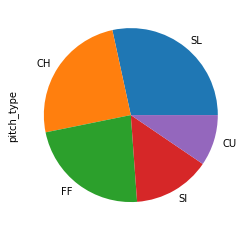

In [ ]:
df_663776['pitch_type'].value_counts().plot(kind='pie')

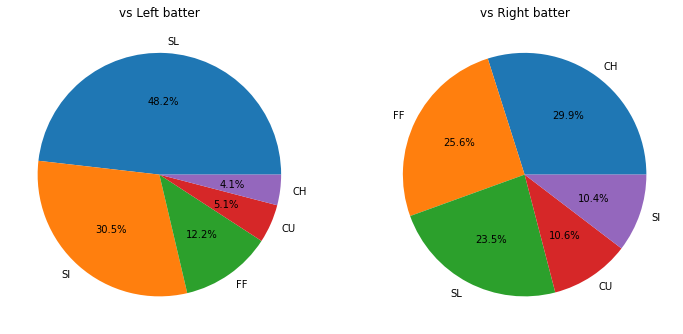

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vs Left batter
df_663776_L['pitch_type'].value_counts().plot(kind='pie', ax=axs[0], autopct='%.1f%%')
axs[0].set_title('vs Left batter')
axs[0].set_ylabel('')  # y軸ラベルを削除

# vs Right batter
df_663776_R['pitch_type'].value_counts().plot(kind='pie', ax=axs[1], autopct='%.1f%%')
axs[1].set_title('vs Right batter')
axs[1].set_ylabel('')  # y軸ラベルを削除

plt.show()


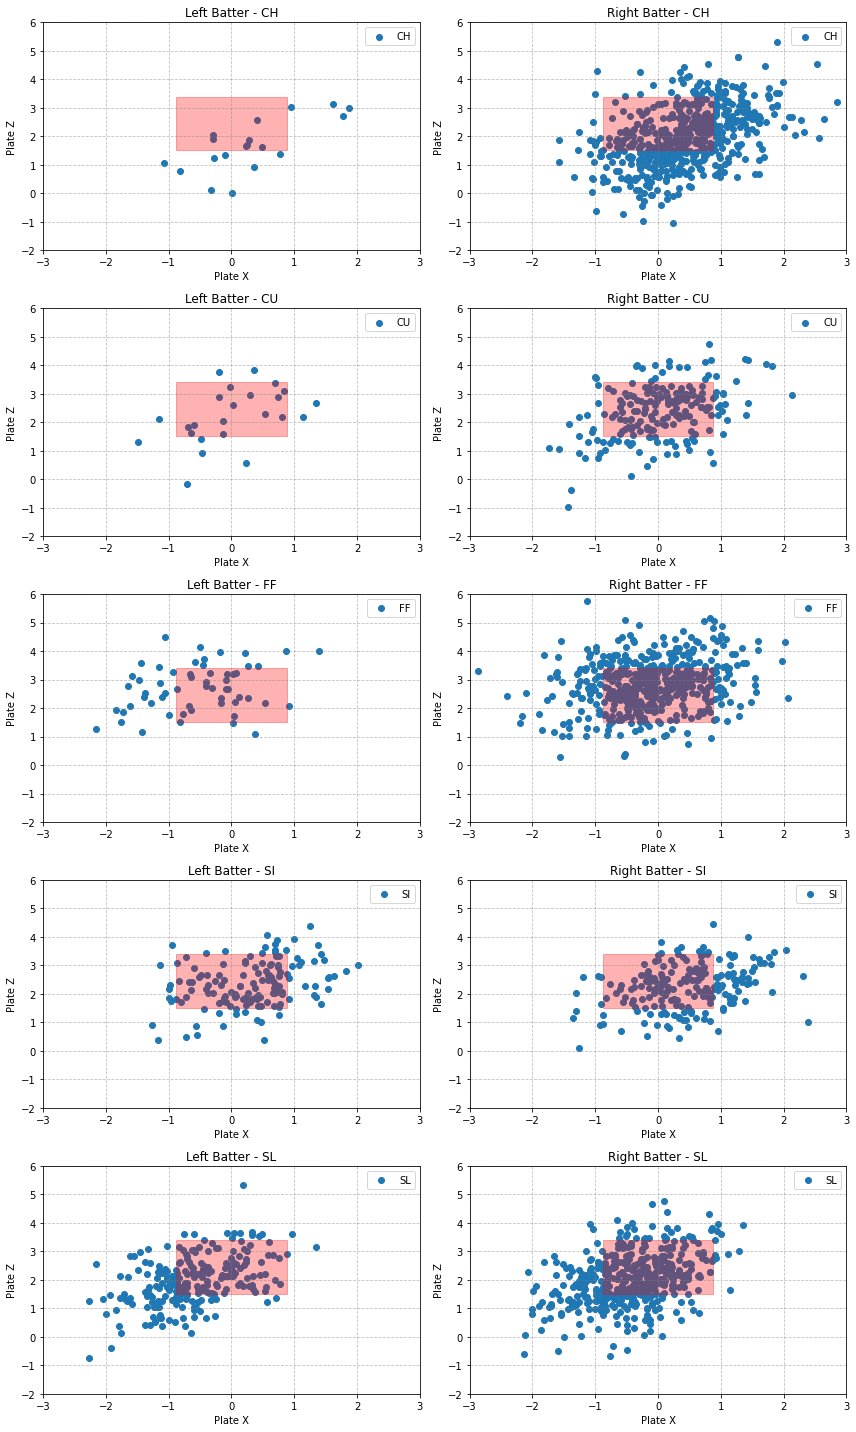

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pitch_types_L = [pt for pt in df_663776_L['pitch_type'].unique() if not pd.isna(pt)]
pitch_types_R = [pt for pt in df_663776_R['pitch_type'].unique() if not pd.isna(pt)]
pitch_types = sorted(set(pitch_types_L) | set(pitch_types_R))

fig, axs = plt.subplots(len(pitch_types), 2, figsize=(12, len(pitch_types) * 4))

for i, pitch_type in enumerate(pitch_types):
    df_663776_L_pt = df_663776_L[df_663776_L['pitch_type'] == pitch_type]
    df_663776_R_pt = df_663776_R[df_663776_R['pitch_type'] == pitch_type]

    axs[i, 0].scatter(df_663776_L_pt['plate_x'], df_663776_L_pt['plate_z'], label=pitch_type)
    axs[i, 1].scatter(df_663776_R_pt['plate_x'], df_663776_R_pt['plate_z'], label=pitch_type)

    axs[i, 0].set_xlim(-3, 3)
    axs[i, 0].set_ylim(-2, 6)
    axs[i, 1].set_xlim(-3, 3)
    axs[i, 1].set_ylim(-2, 6)

    axs[i, 0].set_xlabel('Plate X')
    axs[i, 0].set_ylabel('Plate Z')
    axs[i, 1].set_xlabel('Plate X')
    axs[i, 1].set_ylabel('Plate Z')

    axs[i, 0].legend()
    axs[i, 1].legend()

    axs[i, 0].grid(which='both', linestyle='--', color='gray', alpha=0.5)
    axs[i, 1].grid(which='both', linestyle='--', color='gray', alpha=0.5)

    axs[i, 0].set_title(f"Left Batter - {pitch_type}")
    axs[i, 1].set_title(f"Right Batter - {pitch_type}")

    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    axs[i, 0].fill(x, y, color='r', alpha=0.3)
    axs[i, 1].fill(x, y, color='r', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 全投手データのrelease_speedとspin rateの平均値と標準偏差を算出する
df_mean_all = df.groupby('pitch_type')[['release_speed', 'release_spin_rate']].mean()
df_std_all = df.groupby('pitch_type')[['release_speed', 'release_spin_rate']].std()

# Sandoval投手データのrelease_speedとspin rateの平均値と標準偏差を算出する
df_mean_663776 = df_663776.groupby('pitch_type')[['release_speed', 'release_spin_rate']].mean()
df_std_663776 = df_663776.groupby('pitch_type')[['release_speed', 'release_spin_rate']].std()

# Sandoval投手データに存在するpitch_typeだけを取り出す
valid_pitch_types = df_mean_663776.index

# Sandoval投手データに存在するpitch_typeだけの全投手データを取り出す
df_mean_all = df_mean_all.loc[valid_pitch_types]
df_std_all = df_std_all.loc[valid_pitch_types]

# 指定された順序で全投手データとSandoval投手データの平均値と標準偏差を横に結合する
df_comparison = pd.concat([df_mean_all['release_speed'], df_mean_663776['release_speed'], df_mean_all['release_spin_rate'], df_mean_663776['release_spin_rate'], df_std_all['release_speed'], df_std_663776['release_speed'], df_std_all['release_spin_rate'], df_std_663776['release_spin_rate']], axis=1)
df_comparison.columns = ['mean_release_speed_all', 'mean_release_speed_663776', 'mean_spin_rate_all', 'mean_spin_rate_663776', 'std_release_speed_all', 'std_release_speed_663776', 'std_spin_rate_all', 'std_spin_rate_663776']

# 少数第二位まで表示する
pd.options.display.float_format = "{:.2f}".format

# 指定された形式で2個ずつ表示する
for i in range(0, len(df_comparison.columns), 2):
    display(df_comparison.iloc[:, i:i+2])


,mean_release_speed_all,mean_release_speed_663776
pitch_type,,
CH,85.34,83.74
CU,78.95,78.63
FF,93.94,93.06
SI,93.38,93.45
SL,84.76,86.26


,mean_spin_rate_all,mean_spin_rate_663776
pitch_type,,
CH,1746.64,1606.54
CU,2520.84,2782.68
FF,2277.08,2039.14
SI,2141.59,1923.71
SL,2420.42,2552.97


,std_release_speed_all,std_release_speed_663776
pitch_type,,
CH,3.37,1.29
CU,3.78,2.29
FF,2.59,1.27
SI,2.80,1.34
SL,3.43,1.33


,std_spin_rate_all,std_spin_rate_663776
pitch_type,,
CH,308.50,134.80
CU,303.22,190.29
FF,168.99,122.81
SI,172.33,119.55
SL,245.84,114.88


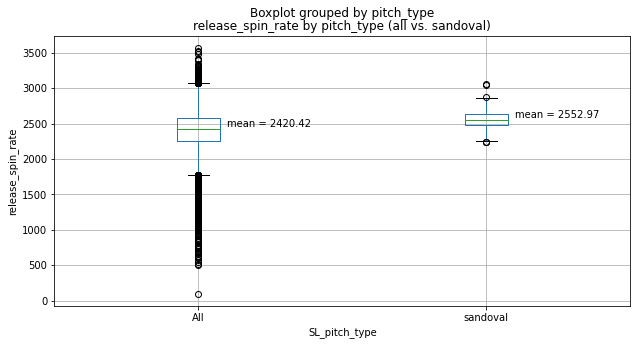

In [ ]:
import matplotlib.pyplot as plt

# ボックスプロットを描画する
fig, ax = plt.subplots(figsize=(10, 5))

# 全投手のSLの球種のrelease_spin_rateをボックスプロットで表示する
df[df['pitch_type'] == 'SL'].boxplot(column='release_spin_rate', by='pitch_type', ax=ax, positions=[1])

#  sandovalのSLの球種のrelease_spin_rateをボックスプロットで表示する
df_663776[df_663776['pitch_type'] == 'SL'].boxplot(column='release_spin_rate', by='pitch_type', ax=ax, positions=[2])

# 全投手のSLの球種のrelease_spin_rateの平均値を表示する
mean_all = df[df['pitch_type'] == 'SL']['release_spin_rate'].mean()
ax.text(1.1, mean_all, f"mean = {mean_all:.2f}", ha='left', va='bottom')

# sandovalのSLの球種のrelease_spin_rateの平均値を表示する
mean_663776 = df_663776[df_663776['pitch_type'] == 'SL']['release_spin_rate'].mean()
ax.text(2.1, mean_663776, f"mean = {mean_663776:.2f}", ha='left', va='bottom')

# グラフのタイトルを設定する
ax.set_title("release_spin_rate by pitch_type (all vs. sandoval)")

# 軸のラベルを設定する
ax.set_xlabel("SL_pitch_type")
ax.set_ylabel("release_spin_rate")

# X軸のラベルを設定する
ax.set_xticklabels(['All', 'sandoval'])

# グラフを表示する
plt.show()

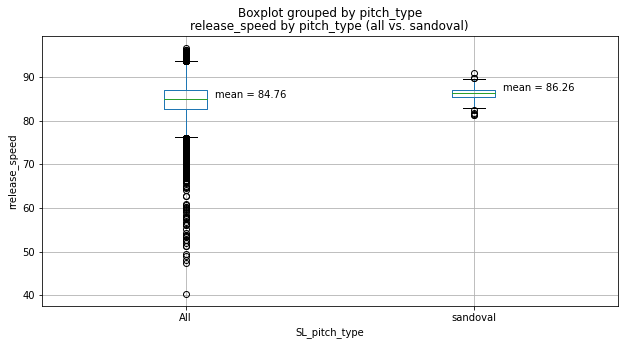

In [ ]:
import matplotlib.pyplot as plt

# ボックスプロットを描画する
fig, ax = plt.subplots(figsize=(10, 5))

# 全投手のSLの球種のrelease_speedをボックスプロットで表示する
df[df['pitch_type'] == 'SL'].boxplot(column='release_speed', by='pitch_type', ax=ax, positions=[1])

#  sandovalのSLの球種のrelease_speedをボックスプロットで表示する
df_663776[df_663776['pitch_type'] == 'SL'].boxplot(column='release_speed', by='pitch_type', ax=ax, positions=[2])

# 全投手のSLの球種のrelease_speedの平均値を表示する
mean_all = df[df['pitch_type'] == 'SL']['release_speed'].mean()
ax.text(1.1, mean_all, f"mean = {mean_all:.2f}", ha='left', va='bottom')

# sandovalのSLの球種のrelease_speedの平均値を表示する
mean_663776 = df_663776[df_663776['pitch_type'] == 'SL']['release_speed'].mean()
ax.text(2.1, mean_663776, f"mean = {mean_663776:.2f}", ha='left', va='bottom')

# グラフのタイトルを設定する
ax.set_title("release_speed by pitch_type (all vs. sandoval)")

# 軸のラベルを設定する
ax.set_xlabel("SL_pitch_type")
ax.set_ylabel("rrelease_speed")

# X軸のラベルを設定する
ax.set_xticklabels(['All', 'sandoval'])

# グラフを表示する
plt.show()

In [ ]:
# 打たれた打球。全体と663776で比較

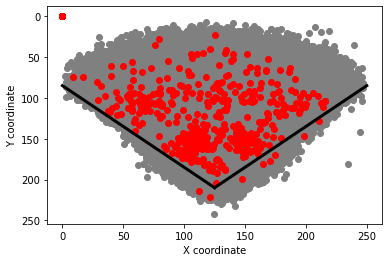

In [ ]:
import matplotlib.pyplot as plt

# pitcher 663776の結果を取り出し、df_663776に格納
df_663776 = df[df["pitcher"] == 663776]

# df_663776 = df_663776.dropna(subset=['hc_x', 'hc_y']) で除外すると三振など除外されてしまう
df_663776 = df_663776.fillna({'hc_x': 0, 'hc_y': 0})

# df = df.dropna(subset=['hc_x', 'hc_y']) すると三振など除外されてしまう
df = df.fillna({'hc_x': 0, 'hc_y': 0})

# 全体をプロット
plt.scatter(df['hc_x'], df['hc_y'], color='gray')

# pitcher 663776の結果を赤色でプロット
plt.scatter(df_663776['hc_x'], df_663776['hc_y'], color='red')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.gca().invert_yaxis()

# フェア線を引く
plt.plot([125, 250], [210, 85], 'k-', lw=3)
plt.plot([125, 0], [210, 85], 'k-', lw=3)

plt.show()


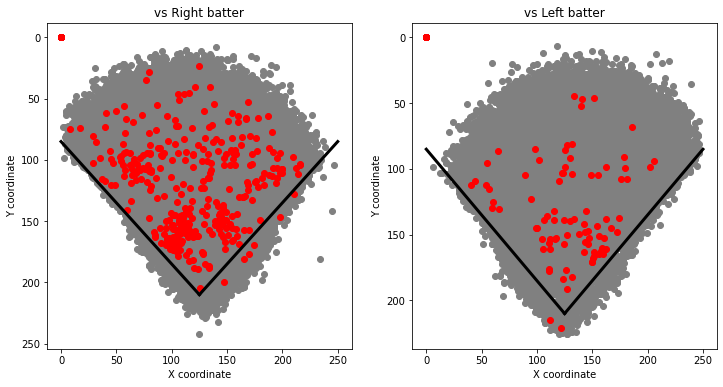

In [ ]:
import matplotlib.pyplot as plt

# 右打者と左打者のデータを取り出す
df_663776_R = df_663776[df_663776["stand"] == "R"]
df_663776_L = df_663776[df_663776["stand"] == "L"]

df_R = df[df["stand"] == "R"]
df_L = df[df["stand"] == "L"]

# グラフを2つ並べて表示する
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 右打者のグラフを表示
axs[0].scatter(df_R['hc_x'], df_R['hc_y'], color='gray')
axs[0].scatter(df_663776_R['hc_x'], df_663776_R['hc_y'], color='red')
axs[0].set_title('vs Right batter')
axs[0].set_xlabel('X coordinate')
axs[0].set_ylabel('Y coordinate')
axs[0].invert_yaxis()

# 左打者のグラフを表示
axs[1].scatter(df_L['hc_x'], df_L['hc_y'], color='gray')
axs[1].scatter(df_663776_L['hc_x'], df_663776_L['hc_y'], color='red')
axs[1].set_title('vs Left batter')
axs[1].set_xlabel('X coordinate')
axs[1].set_ylabel('Y coordinate')
axs[1].invert_yaxis()

# フェア線を引く
for ax in axs:
    ax.plot([125, 250], [210, 85], 'k-', lw=3)
    ax.plot([125, 0], [210, 85], 'k-', lw=3)

plt.show()


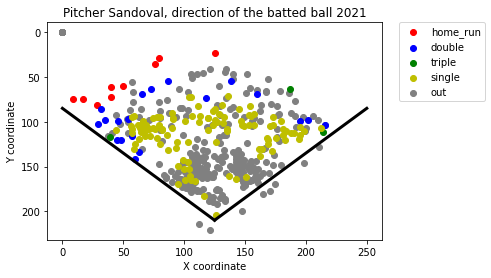

In [ ]:
import matplotlib.pyplot as plt

# Sandoval (663776)のデータを取り出す
df_663776 = df[df["pitcher"] == 663776]

# home_runのデータを取り出す
df_hr = df_663776[df_663776['events'] == 'home_run']
# doubleのデータを取り出す
df_2b = df_663776[df_663776['events'] == 'double']
# tripleのデータを取り出す
df_3b = df_663776[df_663776['events'] == 'triple']
# singleのデータを取り出す
df_1b = df_663776[df_663776['events'] == 'single']
# hit_by_pitchのデータを取り出す
df_hbp = df_663776[df_663776['events'] == 'hit_by_pitch']

# outイベントのデータを取り出す
df_out = df_663776[~df_663776['events'].isin(['home_run', 'double', 'triple', 'single', 'hit_by_pitch'])]

# plotする
plt.scatter(df_hr['hc_x'], df_hr['hc_y'], color='r', label='home_run')
plt.scatter(df_2b['hc_x'], df_2b['hc_y'], color='b', label='double')
plt.scatter(df_3b['hc_x'], df_3b['hc_y'], color='g', label='triple')
plt.scatter(df_1b['hc_x'], df_1b['hc_y'], color='y', label='single')

# plt.scatter(df_hbp['hc_x'], df_hbp['hc_y'], color='c', label='hit_by_pitch')
plt.scatter(df_out['hc_x'], df_out['hc_y'], color='gray', label='out', zorder=0)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# フェア線を引く
plt.plot([125, 250], [210, 85], 'k-', lw=3)
plt.plot([125, 0], [210,85], 'k-', lw=3)

plt.title("Pitcher Sandoval, direction of the batted ball 2021")

plt.show()


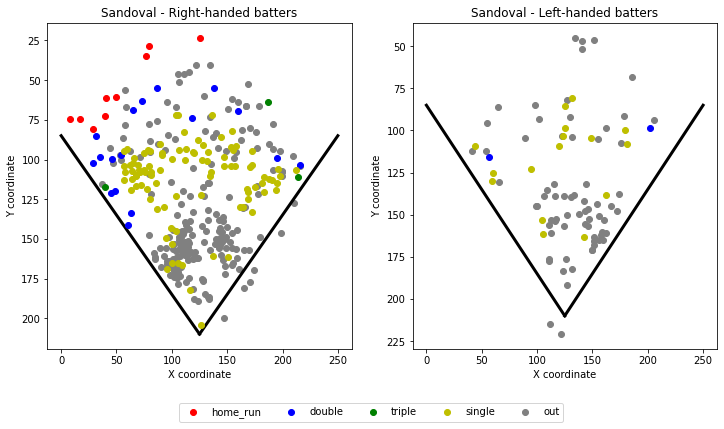

In [ ]:
# Sandoval (663776)のデータを取り出す
df_663776 = df[df["pitcher"] == 663776]

# 右打者と左打者のデータに分割
df_663776_R = df_663776[df_663776['stand'] == 'R']
df_663776_L = df_663776[df_663776['stand'] == 'L']

# Figureを作成し、左右のグラフを描画
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 各グラフに対して、イベントごとにプロットを行う関数を定義
def plot_events(ax, df, title):
    # 各イベントに対して、プロットを行う
    for event, color in zip(['home_run', 'double', 'triple', 'single', 'out'], ['r', 'b', 'g', 'y', 'gray']):
        if event == 'out':
            event_data = df[~df['events'].isin(['home_run', 'double', 'triple', 'single', 'hit_by_pitch'])]
        else:
            event_data = df[df['events'] == event]
        event_data = event_data[(event_data['hc_x'] != 0) & (event_data['hc_y'] != 0)] # 座標(0, 0)のデータを除外
        ax.scatter(event_data['hc_x'], event_data['hc_y'], color=color, label=event, zorder=2 if event == 'out' else 3)

    # 軸ラベル、タイトル、凡例、フェアラインを設定
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.invert_yaxis()
    ax.set_title(title)
    ax.plot([125, 250], [210, 85], 'k-', lw=3)
    ax.plot([125, 0], [210, 85], 'k-', lw=3)

# 各グラフに対して、イベントごとにプロットを行う関数を呼び出し
plot_events(ax1, df_663776_R, "Sandoval - Right-handed batters")
plot_events(ax2, df_663776_L, "Sandoval - Left-handed batters")

# 左右のグラフのレジェンドを結合して1つのレジェンドを作成
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5, 0), loc='upper center', ncol=5, borderaxespad=0)

plt.show()


In [ ]:
# 左打者、右打者に対する被打率と被本塁打を計算し、表示するコードを以下に示します

In [ ]:
exclude_events = ['walk', 'hit_by_pitch', 'sac_fly', 'sac_bunt', 'sac_fly_double_play', 'sac_bunt_double_play', 'catcher_interf', 'wild_pitch', 'game_advisory', 'pickoff_3b', 'caught_stealing_3b', 'pickoff_caught_stealing_2b', 'caught_stealing_home', 'sac_fly_double_play', 'wild_pitch', 'pickoff_1b', 'pickoff_caught_stealing_home', 'pickoff_caught_stealing_3b', 'pickoff_2b', 'caught_stealing_2b', 'other_out']

ba_R = calc_batting_average(df_663776_R, exclude_events)
ba_L = calc_batting_average(df_663776_L, exclude_events)

print(f"対右打者 被打率: {ba_R:.3f}")
print(f"対左打者 被打率: {ba_L:.3f}")

# 右打者の被本塁打数
hr_count_R = len(df_663776_R[df_663776_R['events'] == 'home_run'])
print(f"\n対右打者 被本塁打数: {hr_count_R}")

# 左打者の被本塁打数
hr_count_L = len(df_663776_L[df_663776_L['events'] == 'home_run'])
print(f"対左打者 被本塁打数: {hr_count_L}")


対右打者 被打率: 0.270
対左打者 被打率: 0.149

対右打者 被本塁打数: 9
対左打者 被本塁打数: 0


In [ ]:
unique_events = df['events'].unique()
print(unique_events)


['field_out' 'single' nan 'strikeout' 'walk' 'home_run' 'force_out'
 'hit_by_pitch' 'grounded_into_double_play' 'fielders_choice_out' 'double'
 'strikeout_double_play' 'sac_fly' 'field_error' 'sac_bunt_double_play'
 'fielders_choice' 'sac_bunt' 'double_play' 'caught_stealing_2b' 'triple'
 'other_out' 'pickoff_3b' 'catcher_interf' 'caught_stealing_3b'
 'pickoff_caught_stealing_2b' 'triple_play' 'caught_stealing_home'
 'sac_fly_double_play' 'wild_pitch' 'pickoff_1b'
 'pickoff_caught_stealing_home' 'pickoff_caught_stealing_3b'
 'game_advisory' 'pickoff_2b']
